Import the required packages with their customary aliases as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Q4 Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [5]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


## Q5 How many rows and columns are in gdp_df? What are the data types of each column?

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


Answer: 4 columns, 8219 rows; object, integer, float, float;

## Q6 Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df= gdp_df.drop(columns = ['Value Footnotes'])

In [11]:
gdp_df= gdp_df.rename( columns = {'Country or Area': 'Country',
                          'Value':'gdp_per_capita'})

## Q7 How many countries have data for all years? 

In [13]:
countries=gdp_df.groupby('Country')['Year'].count().reset_index()

In [14]:
countries.max()

Country    Zimbabwe
Year             34
dtype: object

In [15]:
countries[countries['Year']==34].count()

Country    228
Year       228
dtype: int64

In [16]:
#Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
countries[countries['Year']<34].count()

Country    19
Year       19
dtype: int64

## Q8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [18]:
gdp_2020 = gdp_df[gdp_df['Year']== 2020]
gdp_2020.head()

,Country,Year,gdp_per_capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

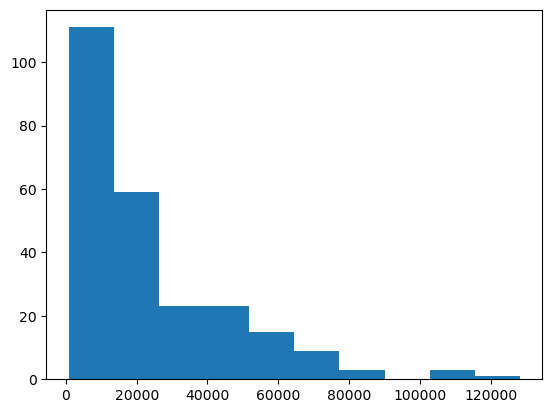

In [19]:
#histogram
plt.hist(gdp_2020['gdp_per_capita'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1da259e6630>,
 'caps': [<matplotlib.lines.Line2D at 0x1da259e6b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da259e5580>],
 'medians': [<matplotlib.lines.Line2D at 0x1da259e7110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da259e7350>],
 'means': []}

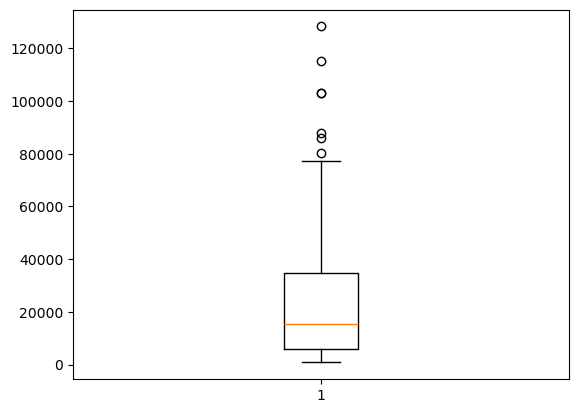

In [20]:
# boxplot
plt.boxplot(gdp_2020['gdp_per_capita'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1da259953a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1da25a147a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1da25a31df0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1da2597cf20>}

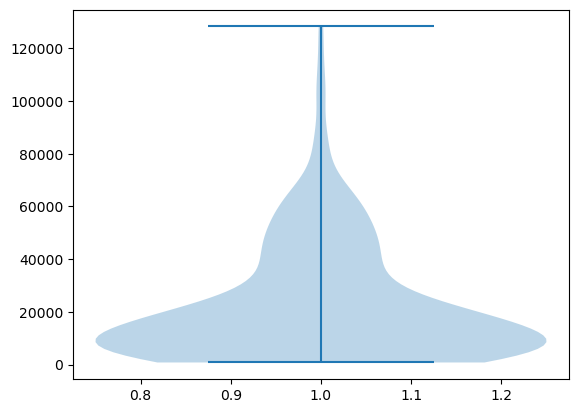

In [21]:
# violin plot
plt.violinplot(gdp_2020['gdp_per_capita'])

<Axes: xlabel='gdp_per_capita', ylabel='Density'>

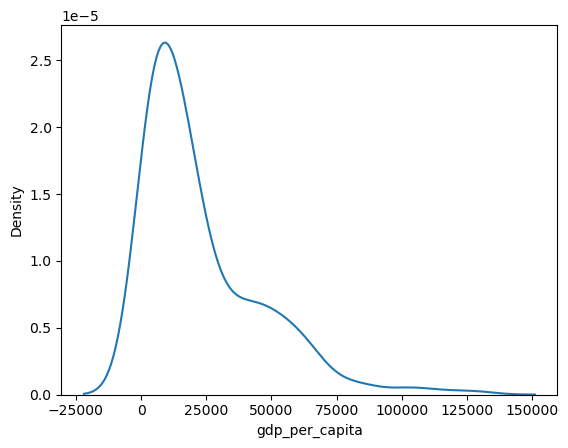

In [22]:
#density plot
sns.kdeplot(gdp_2020['gdp_per_capita'])

## Q9 What was the median GDP per capita value in 2020?

In [24]:
gdp_2020.gdp_per_capita.median()

15309.23598817024

## Q10 For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

In [26]:
#grouping using .isin()
gdp_df[gdp_df['Year'].isin([1970, 1980, 1990, 2000, 2010, 2020])]

,Country,Year,gdp_per_capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


In [27]:
gdp_decades= gdp_df[(gdp_df["Year"] == 1990) | (gdp_df["Year"] == 2000) | (gdp_df["Year"] == 2010) | (gdp_df["Year"] == 2020)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1da261cf7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1da261cfbf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da261cf530>],
 'medians': [<matplotlib.lines.Line2D at 0x1da28c7c230>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da28c7c530>],
 'means': []}

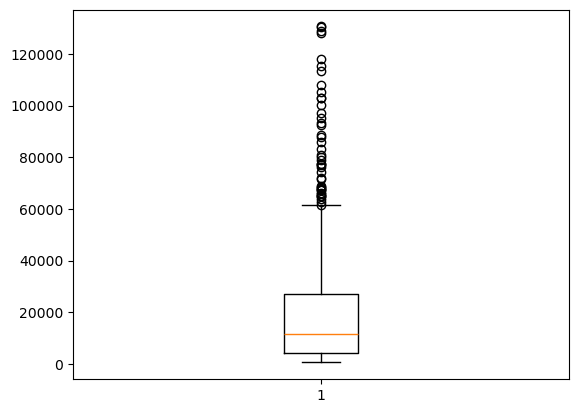

In [28]:
#a boxplot
plt.boxplot(gdp_decades['gdp_per_capita'])

<BarContainer object of 965 artists>

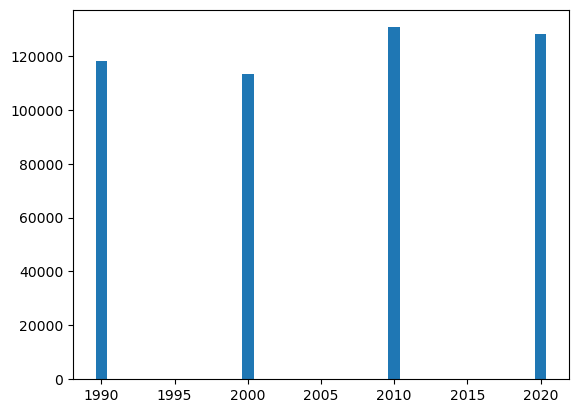

In [29]:
# a barplot
plt.bar(gdp_decades['Year'],
         gdp_decades['gdp_per_capita'])

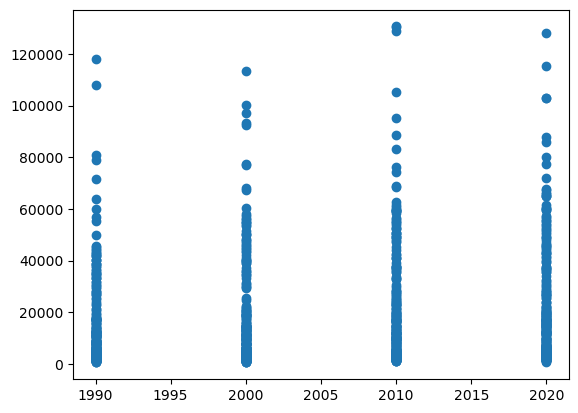

In [30]:
#a scatterplot
plt.scatter(gdp_decades['Year'],
         gdp_decades['gdp_per_capita'])

<Axes: xlabel='Year', ylabel='gdp_per_capita'>

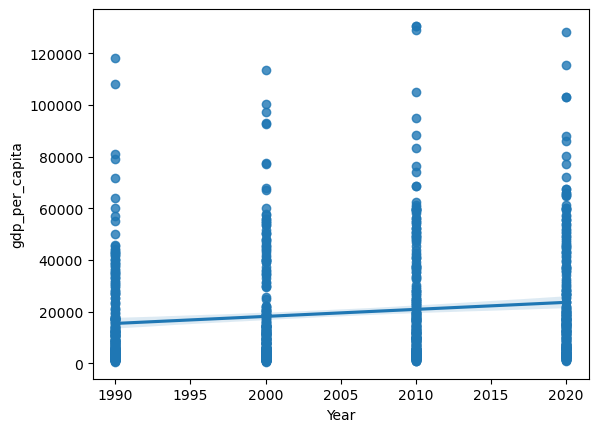

In [31]:
# a scatter  plot with a trend line
sns.regplot(x='Year', y='gdp_per_capita', data=gdp_decades)

## Q11 Which country was the first to have a GDP per capita greater than $100,000?

In [33]:
gdp_df[gdp_df['gdp_per_capita']>100000].sort_values(by= 'Year', ascending = True)

,Country,Year,gdp_per_capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
7825,United Arab Emirates,1992,101100.487512
...,...,...,...
6116,Qatar,2023,116159.142559
4457,"Macao SAR, China",2023,104961.643485
6511,Singapore,2023,127543.554752
4423,Luxembourg,2023,130373.477942


## Q12 Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [35]:
gdp_2020desc= gdp_2020.sort_values(by= "gdp_per_capita", ascending = False)
gdp_2020desc.head()

,Country,Year,gdp_per_capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174


In [36]:
lux_gdp = gdp_df[gdp_df['Country'] == 'Luxembourg']

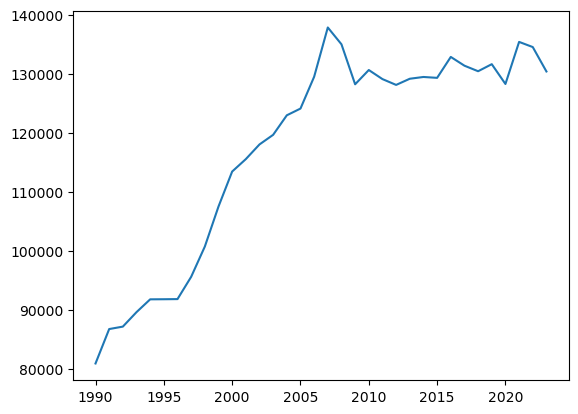

In [37]:
plt.plot( lux_gdp['Year'],
         lux_gdp['gdp_per_capita'])

## Q13 Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [39]:
gdp_2020asc= gdp_2020.sort_values(by= "gdp_per_capita", ascending = True)
gdp_2020asc.head()

,Country,Year,gdp_per_capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765


In [40]:
bur_gdp = gdp_df[gdp_df['Country']=='Burundi']

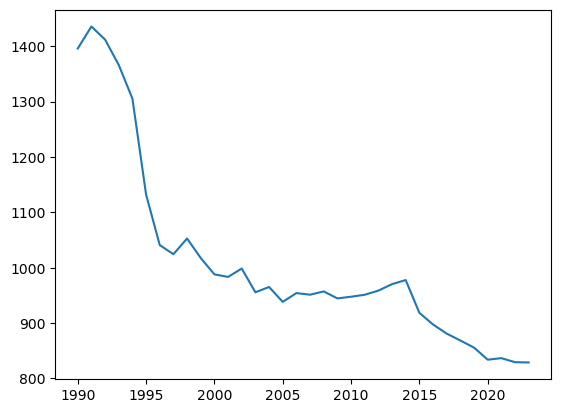

In [41]:
plt.plot(bur_gdp['Year'],
         bur_gdp['gdp_per_capita'])

## Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

## Q14 Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [44]:
internet_df= pd.read_csv('../data/internet_usage.csv',on_bad_lines ='skip', skipfooter=299)   

C:\Users\chris\AppData\Local\Temp\ipykernel_25312\742111845.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  internet_df= pd.read_csv('../data/internet_usage.csv',on_bad_lines ='skip', skipfooter=299)


## Q15 Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [46]:
internet_df= internet_df.drop(columns = ['Value Footnotes'])

In [47]:
internet_df= internet_df.rename( columns = {'Country or Area': 'Country',
                          'Value':'internet_user_pct'})

In [48]:
internet_df.head()

,Country,Year,internet_user_pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


## Q16 Look at the number of observations in this dataset per year. What do you notice?

## Q17 What is the first year to have a non-zero internet users percentage value?

 Answer: Denmark

In [52]:
internet_df[internet_df['internet_user_pct']>0.00].sort_values(by ='Year', ascending = True)

,Country,Year,internet_user_pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


## Q18 How does the distribution of internet users percent differ for 2000 and 2014?

In [54]:
distribution= internet_df[internet_df['Year'].isin([2000, 2014])]

<Axes: xlabel='Year', ylabel='internet_user_pct'>

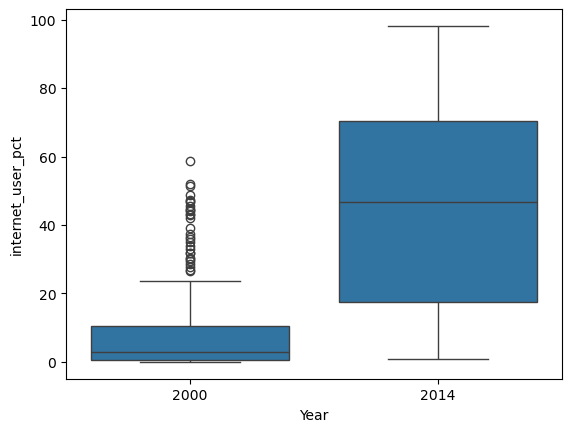

In [55]:
sns.boxplot(x = distribution['Year'], y= distribution ['internet_user_pct'])

## Q19 For how many countries was the percentage of internet users below 5% in 2014?

In [57]:
internet_14 = internet_df[internet_df['Year']==2014]

In [58]:
internet_14[ internet_14 ['internet_user_pct']<5].count()

Country              10
Year                 10
internet_user_pct    10
dtype: int64

## Q20 Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [60]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer', on = ['Year','Country'])

In [61]:
gdp_and_internet_use.head()

,Country,Year,gdp_per_capita,internet_user_pct
0,Afghanistan,1990,NaN,0.0
1,Africa Eastern and Southern,1990,3386.854480,NaN
2,Africa Western and Central,1990,3299.401375,NaN
3,Albania,1990,5327.747458,0.0
4,Algeria,1990,11728.545729,0.0


## Q21 Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [63]:
top_internet_users = gdp_and_internet_use[(gdp_and_internet_use["Country"].isin(["Iceland", "Bermuda", "Norway"]))]

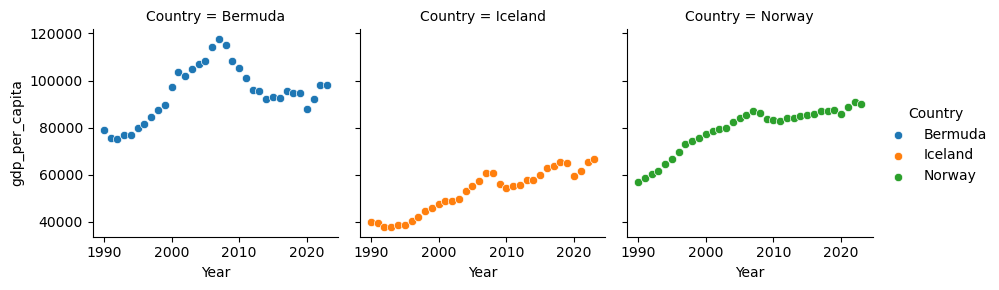

In [64]:
grid = sns.FacetGrid(top_internet_users, col="Country", hue="Country")
grid.map_dataframe(sns.scatterplot, x = "Year", y = "gdp_per_capita")
grid.add_legend() 

## Q22 Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014

In [66]:
gdp_and_internet_use_2014= gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values( by= 'internet_user_pct', ascending=False)

In [67]:
gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values( by= 'internet_user_pct', ascending=False)

,Country,Year,gdp_per_capita,internet_user_pct
6853,Iceland,2014,57981.199448,98.1580
6822,Falkland (Malvinas) Islands,2014,NaN,97.6000
6760,Bermuda,2014,92298.387811,96.8000
6928,Norway,2014,84753.668395,96.3005
6801,Denmark,2014,60992.212220,95.9935
...,...,...,...,...
7001,TÃ¼rkiye,2014,24573.488878,NaN
7008,Upper middle income,2014,15312.435710,NaN
7014,Virgin Islands,2014,42853.898660,NaN
7016,West Bank and Gaza,2014,5990.426615,NaN


## Q23 Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

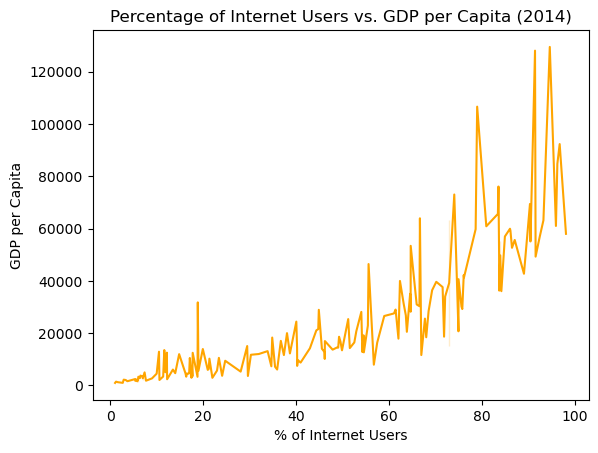

In [69]:
sns.lineplot(data=gdp_and_internet_use_2014, x="internet_user_pct", y="gdp_per_capita", color="orange")
plt.xlabel("% of Internet Users")
plt.ylabel("GDP per Capita")
plt.title("Percentage of Internet Users vs. GDP per Capita (2014)")
plt.show()

## Q24 Stretch Question: Use the qcut function from pandas to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [71]:
gdp_and_internet_use_2014=gdp_and_internet_use_2014.dropna(subset=['gdp_per_capita'])

In [72]:
gdp_and_internet_use_2014['gdp_group']=pd.qcut(gdp_and_internet_use_2014['gdp_per_capita'], 
        q=3,
        labels = ["Low", "Medium", "High"])

In [73]:
gdp_and_internet_use_2014.head()

,Country,Year,gdp_per_capita,internet_user_pct,gdp_group
6853,Iceland,2014,57981.199448,98.1580,High
6760,Bermuda,2014,92298.387811,96.8000,High
6928,Norway,2014,84753.668395,96.3005,High
6801,Denmark,2014,60992.212220,95.9935,High
6891,Luxembourg,2014,129443.183641,94.6702,High


## Q25 Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [75]:
gdp_and_internet_use_2014.groupby(['gdp_group'])[['internet_user_pct']].median()

C:\Users\chris\AppData\Local\Temp\ipykernel_25312\1157789057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_and_internet_use_2014.groupby(['gdp_group'])[['internet_user_pct']].median()


,internet_user_pct
gdp_group,
Low,11.6000
Medium,44.5945
High,75.9800
